### Simple linear regression

Linear regression analysis study the relation bewtween random variables

variables:
y = random variable
x = predict variable

parameters:
b0 = intercepto
b1 = inclinação

Desvio/Erro aleatório:
e = s² (variância)

Modelo probabilístico linear:
y = b0 + b1x + e

u_yx => Valor esperado de y quando x adota o valor x*<br>
u_y20 = 250

s²_yx => Variância esperada de y quando x adota o valor x*<br>
s²_y20 = 2,15

Resumo: Diagramas de dispersão, valor esperado, valor esperado para variação, probabilidade de um valor esperado em determinado ponto considerando desvio padrão

#### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import stemgraphic
import math

from scipy.integrate import quad
from tabulate import tabulate
from matplotlib import gridspec

##### Help Functions

In [2]:
#Description dataframe
def first_analysis(df):
    print('Info:')
    df.info()

    print('\n\nShape:\nNumber of rows: {}'.format(df.shape[0]))
    print('Number of colums : {}'.format(df.shape[1]))

    print('\n\nDescribe:')
    b = df.describe()

    return b


#### 1. 
A loja "GT Auto" decidiu aprimorar os treinamentos de vendedores inexperientes de carros, criando uma base de dados dos carros disponíveis que apresente algumas informações importantes para treinar os novos vendedores. A base de dados foi criada em um documento de texto e contem as seguintes informações:

*   Marca/Modelo/Ano do carro: brand/model/year
*   Capacidade volumétrica (cc) ou volume de deslocamento do motor: cap_vol.
*   Consumo de combustível (km/l): consumo.
*   Potência (cv): power.
*   Peso (kg): weight.
*   0-100 (s), tempo que o carro demora para atingir 100 m: cemm.
*   Número de cilindros: nu_cy

Analise os dados dos 14 carros com motor aspirado que a "GT Auto" tem em estoque para venda, e crie alguns gráficos que simplifiquem as informações úteis para ajudar os novos vendedores a entender melhor as características dos carros. Seguem algumas sugestões:

In [3]:
df = pd.read_csv('data/cars_vertical.csv', delimiter = ';')
df

,brand/model/year,cap_vol,consumo,power,weight,cemm
0,Gurgel BR800 0.8 1991,792,12.0,33,650,34.4
1,FIAT UNO Mille EP 1996,994,10.4,58,870,18.6
2,Hyundai HB20 Sense 2020,1000,12.8,80,989,14.5
3,FIAT Strada 1.4 2016,1368,10.3,86,1084,12.5
4,VolksWagen GOL 1.6 2015,1598,10.5,104,961,9.8
5,Chevrolet Cruze LTZ 1.8 2016,1796,8.5,144,1427,10.2
6,Honda Civic EXR 2016,1997,9.5,155,1294,10.9
7,Ford Focus 2.0 GLX 2012,1999,9.2,148,1347,10.4
8,BMW 325i 3.0 2012,2996,6.5,218,1460,7.1
9,AUDI A4 3.2 V6 Fsi 2011,3197,7.1,269,1610,6.4


In [4]:
first_analysis(df)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand/model/year  14 non-null     object 
 1   cap_vol           14 non-null     int64  
 2   consumo           14 non-null     float64
 3   power             14 non-null     int64  
 4   weight            14 non-null     int64  
 5   cemm              14 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 800.0+ bytes


Shape:
Number of rows: 14
Number of colums : 6


Describe:


,cap_vol,consumo,power,weight,cemm
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,2867.785714,8.357143,218.000000,1294.714286,11.007143
std,2066.127935,2.848944,168.564984,348.445654,7.917893
min,792.000000,3.000000,33.000000,650.000000,3.600000
25%,1425.500000,6.525000,90.500000,1012.750000,6.175000
50%,1998.000000,8.850000,151.500000,1320.500000,10.000000
75%,3422.750000,10.375000,296.750000,1572.500000,12.100000
max,7291.000000,12.800000,602.000000,1760.000000,34.400000


##### a. 
Realizar um diagrama de ramo e folha para observar as variáveis.

(<Figure size 540x126 with 1 Axes>, <Axes:>)

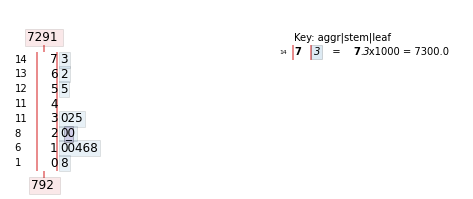

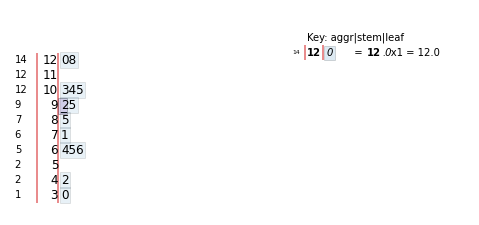

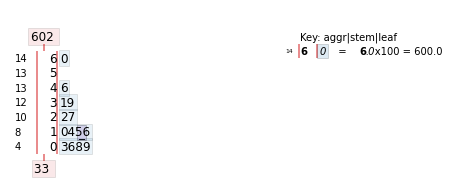

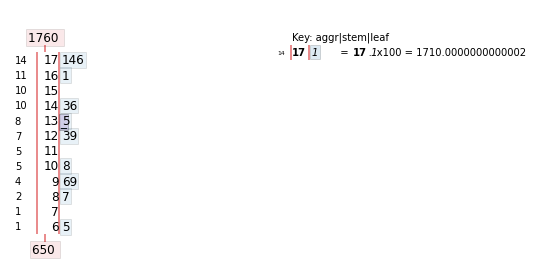

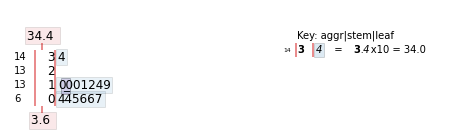

In [5]:
c1 = df['cap_vol']
c2 = df['consumo']
c3 = df['power']
c4 = df['weight']
c5 = df['cemm']

#cap_vol
stemgraphic.stem_graphic(c1, scale = 1000)

#consumo
stemgraphic.stem_graphic(c2, scale = 1)

#power
stemgraphic.stem_graphic(c3, scale = 100)

#weight
stemgraphic.stem_graphic(c4, scale = 100)

#cemm
stemgraphic.stem_graphic(c5, scale = 10)

##### b. 
Realize um diagrama de dispersão para verificar a correlação entre a capacidade volumétrica e o consumo de combustível.

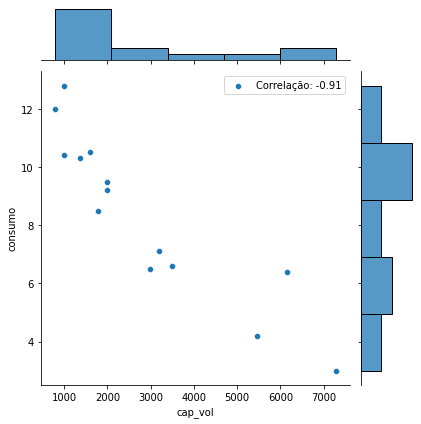

In [6]:
sns.jointplot(x = c1, y = c2, data = df, label = f'Correlação: {np.round(np.corrcoef(c1, c2)[0, 1], 2)}')

##### c. 
Realize um diagrama de dispersão para verificar a correlação entre a capacidade volumétrica e potência.

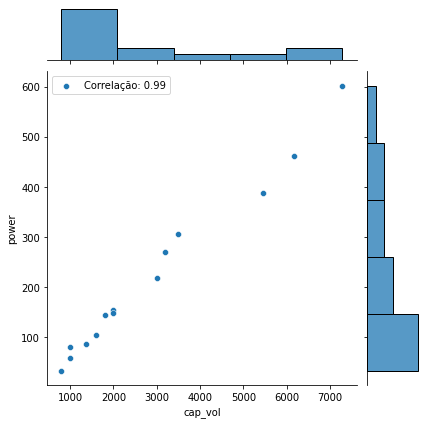

In [9]:
sns.jointplot(x = c1, y = c3, data = df, label = f'Correlação: {np.round(np.corrcoef(c1, c3)[0, 1], 2)}')

##### D. 
Realize um diagrama de dispersão para verificar a correlação entre o peso e o tempo 0-100. Explique para a "GT Auto" como deve usar essas informações nos treinamentos.

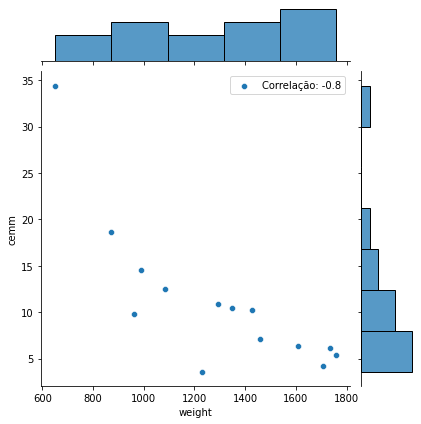

In [10]:
#Carros com motores maiores tem mais potência e são mais econômicos
sns.jointplot(x = c4, y = c5, data = df, label = f'Correlação: {np.round(np.corrcoef(c4, c5)[0, 1], 2)}')

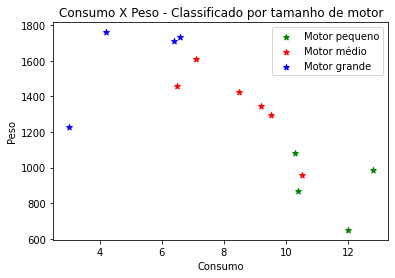

In [11]:
#Classificação dos carros e Diagrama de Dispersão indicando as classes
df['class'] = df['cap_vol'].apply(lambda x: 0 if x <= 1400 else
                                            1 if (x > 1400) & (x <= 3200) else 2)

dfa = df[df['class'] == 0]
dfb = df[df['class'] == 1]
dfc = df[df['class'] == 2]


plt.scatter(dfa['consumo'], dfa['weight'], color = 'green', marker = '*', label = 'Motor pequeno')
plt.scatter(dfb['consumo'], dfb['weight'], color = 'red', marker = '*', label = 'Motor médio')
plt.scatter(dfc['consumo'], dfc['weight'], color = 'blue', marker = '*', label = 'Motor grande')
plt.xlabel('Consumo')
plt.ylabel('Peso')
plt.title('Consumo X Peso - Classificado por tamanho de motor')
plt.legend()
plt.show()

#### 2.
O artigo "Alguma experiência de campo no uso de um método acelerado na estimativa da resistência do concreto em 28 dias" (*Some field experience in the use of an accelerated method in estimating 28-day strength of concrete*, J. of Amer. Concrete Institute, 1969: 895) fez a regressão de y = resistência do concreto usando tratamento padrão de 28 dias (1 psi = 7 KPa) em relação a x = resistência do concreto usando tratamento acelerado (psi). Suponha que a equação da reta de regressão verdadeira seja $y = 1800 + 1,3 x$. 

##### a. 
Qual é o valor esperado da resistência aos 28 dias quando a resistência usando o tratamento acelerado é igual a 2500? 

In [97]:
b0 = 1800
b1 = 1.3
x = 2500
u_y2500 = b0 + (b1 * x)
print('O valor esperado de Y para x = 2500 é', u_y2500)

O valor esperado de Y para x = 2500 é 5050.0


##### b. 
Até que ponto podemos esperar que a resistência aos 28 dias mude quando a resistência usando tratamento acelerado aumenta em 1 psi vezes?

In [98]:
#Multiplicando b1 obtem-se o resultado da variação na inclinação
psi_1 = b1 * 1
print('Equação da reta considerando o aumento 1 psi vezes: y = {} + {}x'.format(b0, psi_1))

Equação da reta considerando o aumento 1 psi vezes: y = 1800 + 1.3x


##### c. 
Responda ao item (b) para um aumento de 100 psi.

In [99]:
psi_100 = b1 * 100
print('Equação da reta considerando o aumento 1 psi vezes: y = {} + {}x'.format(b0, psi_100))

Equação da reta considerando o aumento 1 psi vezes: y = 1800 + 130.0x


##### d. 
Responda ao item (b) para uma diminuição de 100 psi.  

In [100]:
psi_n100 = b1 * (-100)
print('Equação da reta considerando o aumento 1 psi vezes: y = {} {}x'.format(b0, psi_n100))

Equação da reta considerando o aumento 1 psi vezes: y = 1800 -130.0x


#### 3. 
Em relação ao exercício anterior, suponha que o desvio padrão(s) do desvio aleatório(e) seja 350 psi (1 psi = 7 KPa).  

##### a. 
Qual é a probabilidade de o valor observado de resistência aos 28 dias ultrapassar 5.000 psi, quando o valor da resistência usando trata-mento acelerado for 2.000? 

In [12]:
#Cálculo de um valor esperado atender um determinado intervalo
s = 350                                         #desvio padrão
x = 2000                                        #variável aleatória
y = 5000                                        #valor alvo
u_y2000 = 1800 + 1.3 * x
print('O valor esperado de Y para x = 2000 é',u_y2000)

#Cálculo da probabilidade
p = (y - u_y2000) / s
print('P(Y > 5000) = {}'.format(p))

#O valor p obtido deve ser procurado na tabela Z e subtrair de 1
phi_171 = 0.9563
p_y = 1 - phi_171

print('Phi(171) = {} \nP(Y > 5000) = {}'.format(phi_171, p_y))

O valor esperado de Y para x = 2000 é 4400.0
P(Y > 5000) = 1.7142857142857142
Phi(171) = 0.9563 
P(Y > 5000) = 0.04369999999999996


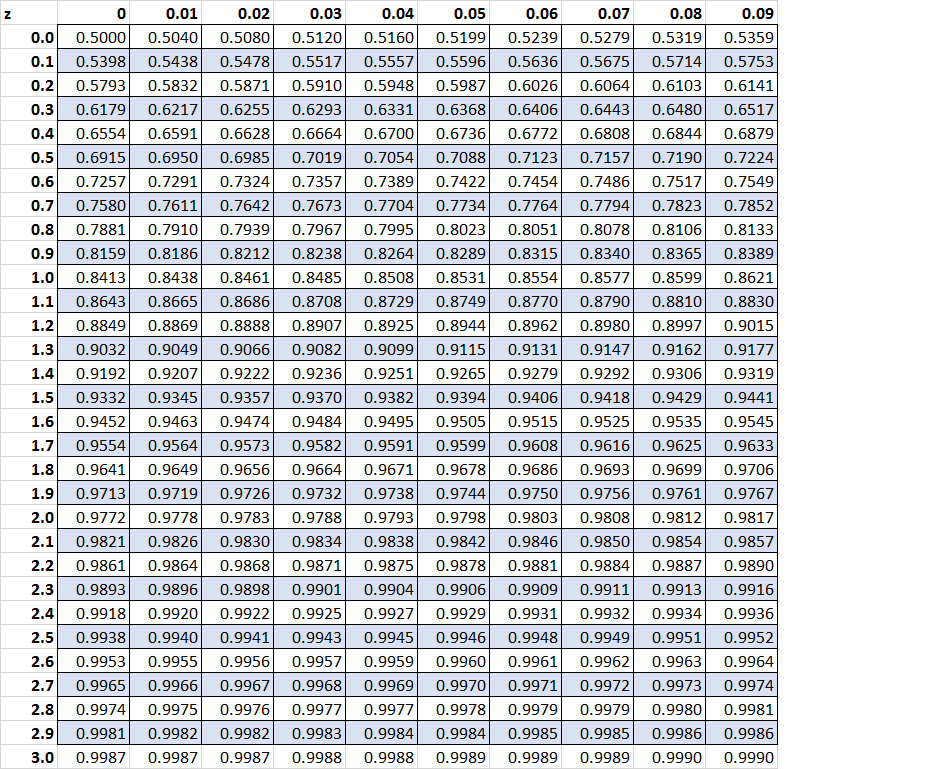

[link text](https://www.statology.org/z-table/)

In [16]:
#Função usada para obter Phi, definir a equação considerando uma média de zero
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2 * np.pi)
    return(constant * np.exp((-x ** 2) / 2.0) )

#Obter o valor da tabela Z
pza,_ = quad(normalProbabilityDensity, np.NINF, 1.71)

#probabilidade do valor esperado ultrapassar
pym = 1 - pza

print('Phi(171) = {} \nP(Y > 5000) = {}'.format(pza, pym))

Phi(171) = 0.9563670634759682 
P(Y > 5000) = 0.043632936524031773


##### b. 
Qual é a probabilidade de o valor observado de resistência aos 28 dias ultrapassar 5.000 psi, quando o valor da resistência usando tratamento acelerado for 2.500?

In [14]:
x = 2500
uy = 1800 + 1.3 * x
uy
print('O valor esperado de Y para x = 2500 é', uy)

y = 5000
s = 350
p = (y - uy) / s
print('\nP(Y > 5000) = {}'.format(p))

phi143 = 0.5568
pym = 1 - phi143
print('\nPhi(143) = {} \n\nP(Y > 5000) = {}'.format(phi143, pym))

O valor esperado de Y para x = 2500 é 5050.0

P(Y > 5000) = -0.14285714285714285

Phi(143) = 0.5568 

P(Y > 5000) = 0.44320000000000004


##### c. 
Considere fazer duas observações independentes sobre a resistência aos 28 dias, a primeira para uma resistência usando tratamento acelerado de 2.000 e a segunda para x = 2.500. Qual é a probabilidade de que a segunda observação exceda a primeira em mais de 1.000 psi?


In [18]:
#y1 para tratamento acelerado de 2.000:
uy_2000 = 1800 + (1.3 * 2000)
uy_2000

#y2 para tratamento acelerado de 2.500:
uy_2500 = 1800 + (1.3 * 2500)
uy_2500

#desvio aleatório
s = 350

print('Valor esperado de y para x = 2000: {} \nValor esperado de y para x = 2500: {} \nDesvio padrão: {}'.format(uy_2000, uy_2500, s))

#Para o caso de duas amostras específicas o valor médio se calcula como segue:
#E(y2 - y1) = E(y2) - E(y1) = Beta_1
ey2y1 = uy_2500 - uy_2000
b_1 = ey2y1

#Quanto aos dados do desvio aleatório:
#v(y2 - y1) = v(y2) - v(y1) = (s ** 2) + (s ** 2)
vy2y1 = (s ** 2) + (s ** 2)

#Variância => v = math.pow(vy1y2, 1 / 2)
v = math.pow(vy2y1, 1 / 2)

print('Valor médio calculado: {} \nDesvio aleatório calculado: {} \nVariância: {}'.format(ey2y1, vy2y1, v))

#Calcular Z e encontrar phi na tabela
#P(Z > (x - u) / s)
zy2y1 = (1000 - ey2y1) / v

#Calculo de phi
phi071,_ = quad(normalProbabilityDensity, np.NINF, 0.71)

#P(y2 - y1 > 1000) = 1 - phi(071)
py2y1 = 1 - phi071

print('Z Calculado: {} \nPhi(0.71): {} \nProbabilidade de exceder 1000 psi: {}'.format(zy2y1, phi071, py2y1))

Valor esperado de y para x = 2000: 4400.0 
Valor esperado de y para x = 2500: 5050.0 
Desvio padrão: 350
Valor médio calculado: 650.0 
Desvio aleatório calculado: 245000 
Variância: 494.9747468305833
Z Calculado: 0.7071067811865475 
Phi(0.71): 0.7611479319100142 
Probabilidade de exceder 1000 psi: 0.23885206808998583


##### d. 
Sejam Y1 e Y2 as observações sobre a resistência aos 28 dias quando x = x1 e x = x2, respectivamente. Em quanto x2 excederia x1 para que $P(Y2 > Y1) = 0,95$?

**Dados**
*   Pergunta: Se $P(Y2 > Y1) = 0,95$, quanto vale $x_2 - x_1$ ?.
*   Do item anterior $\sigma=V(Y_2-Y1)= 494.97$.

**Resposta**
Lembrando que a reta de regresão simples é"
$Y= \beta_0 + \beta_1 x_i $

$Y= 1800 + 1,3 x_i $

Para o caso de duas amostras específicas o valor médio se descreve como segue:
$E(Y_2-Y_1)= E(Y_2) - E(Y_1)$

$E(Y_2-Y_1)= (1800 + 1,3 x_2) - (1800 + 1,3 x_1)$

$E(Y_2-Y_1)= 1800 + 1,3 x_2 - 1800 - 1,3 x_1$

$E(Y_2-Y_1)= 1,3 x_2 - 1,3 x_1$

$E(Y_2-Y_1)= 1,3 (x_2 - x_1) = μ $  (Eq1)

Por outra parte:

$P(Y_2 > Y_1)= 0,95$

$P(Y_2-Y_1 > 0 )= 0,95$

$P(Y_2 - Y_1 > 0)= P( Z > \frac{x-μ}{\sigma}) = 0,95 $ (Eq2)

Substituindo Eq1 em Eq2.

$P(Y_2 - Y_1 > 0)= P( Z > \frac{0-1,3 (x_2 - x_1)}{494,97}) = 0,95 $ (Eq3)

$P(Y_2 - Y_1 > 0)= P( Z > \frac{-1,3 (x_2 - x_1)}{494,97}) = 0,95 $ (Eq3)



In [20]:
a = -1.3 / v
a


-0.002626396615835748

$P(Y_2 - Y_1 > 0) = 1 - Phi(-0.0263(x_2 - x_1))= 0,95$

$1 - Phi(-0.00263(x_2 - x_1))= 0,95$

O valor de Phi(-0.00263(x_2 - x_1) pode ser encontrado na tabela de Z

$Phi(-0.00263(x_2 - x_1))= 0,95 - 1$

$Phi(-0.00263(x_2 - x_1))= -0,05$

Portanto devemos procurar na tabela Z o valor que corresponde a -0,05 usado a tabela z negativa

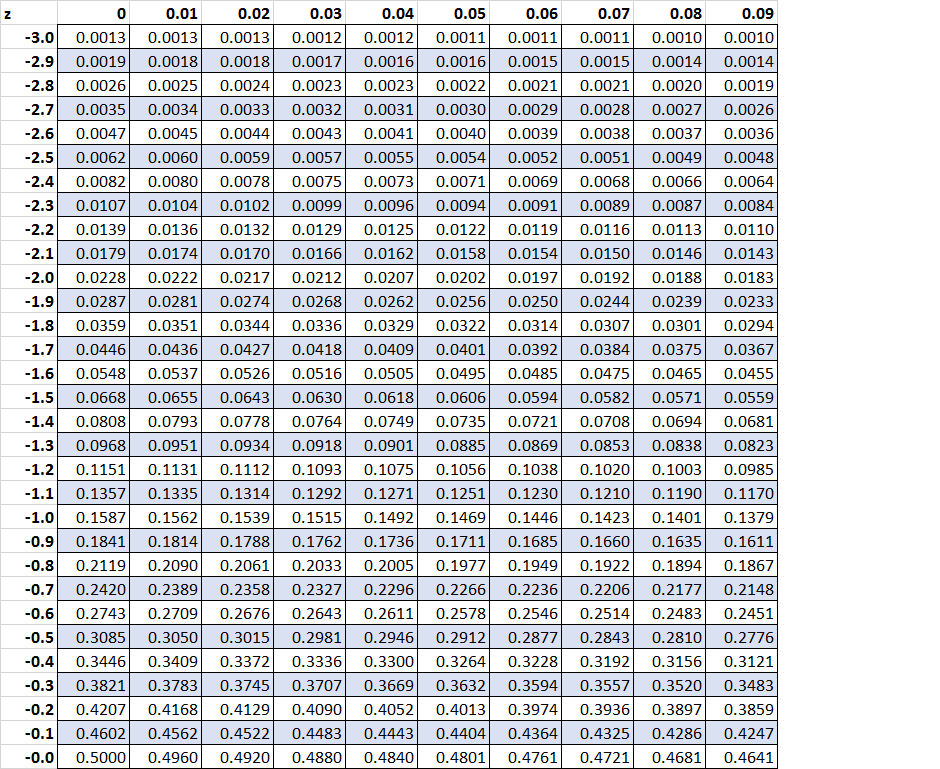

Da tabela
$Phi(−0.00263(x_2−x_1))=−0,05$ 

$−0.00263(x_2−x_1) = -1,645$  


In [21]:
x2x1 = -1.645 / (-0.00263)
x2x1

625.4752851711027

Assim $(x2−x1) = 625.33$  
Portanto para $P(Y_2 > Y_1)= 0,95$ $x_2$ pode esceder $x_1$ em 625.33  


#### 4.
Observe os seguintes dados de Área de Superfície Ocular (ASO) e largura da pálpebra.<br>

ASO = [1.02, 1.21, 0.88, 0.98, 1.52, 1.83, 1.50, 1.80, 1.74, 1.63, 2.00, 2.80, 2.48, 2.47, 3.05, 3.18, 3.76, 3.68, 3.82, 3.21, 4.27, 3.12, 3.99, 3.75, 4.10, 4.18, 3.77, 4.34, 4.21, 4.92]  <br>

E largura da pálpebra = [0.40, 0.42, 0.48, 0.51, 0.57, 0.60, 0.70, 0.75, 0.75, 0.78, 0.84, 0.95, 0.99, 1.03, 1.12, 1.15, 1.20, 1.25, 1.25, 1.28, 1.30, 1.34, 1.37, 1.40, 1.43, 1.46, 1.49, 1.55, 1.58, 1.60] <br>

Realize um diagrama de dispersão de Área de Superfície Ocular (ASO) em função da largura da pálpebra. Observando a imagem que você criou, assinale a alternativa correta. 



<AxesSubplot:>

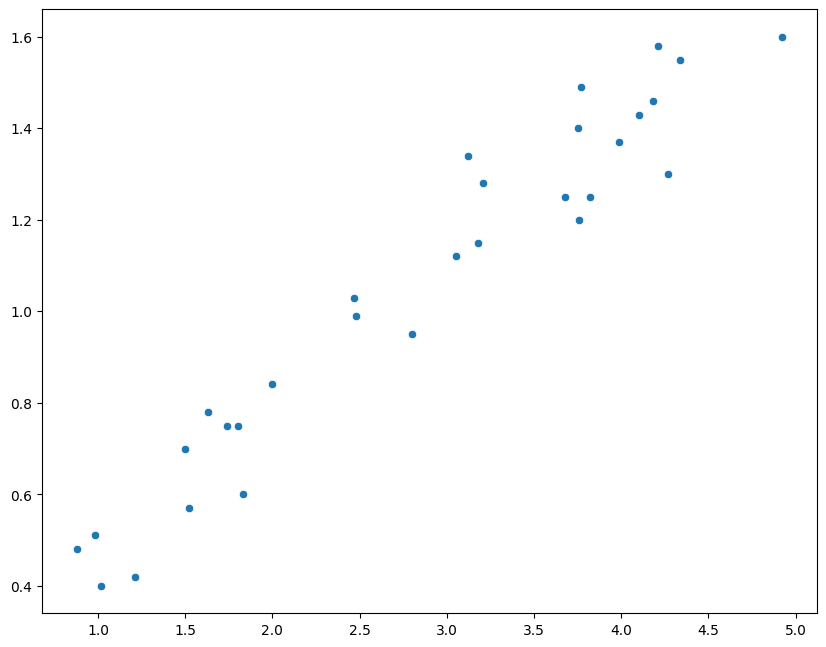

In [53]:
area_ocular =  [1.02, 1.21, 0.88, 0.98, 1.52, 1.83, 1.50, 1.80, 1.74, 1.63, 2.00, 2.80, 
                2.48, 2.47, 3.05, 3.18, 3.76, 3.68, 3.82, 3.21, 4.27, 3.12, 3.99, 3.75, 
                4.10, 4.18, 3.77, 4.34, 4.21, 4.92]

largura_palpebra = [0.40, 0.42, 0.48, 0.51, 0.57, 0.60, 0.70, 0.75, 0.75, 0.78, 0.84, 0.95, 
                    0.99, 1.03, 1.12, 1.15, 1.20, 1.25, 1.25, 1.28, 1.30, 1.34, 1.37, 1.40, 
                    1.43, 1.46, 1.49, 1.55, 1.58, 1.60]

df = pd.DataFrame({'Área da superfície ocular':area_ocular, 'Largura da pálpebra':largura_palpebra})
sns.scatterplot(x = area_ocular, y = largura_palpebra, data = df)

#Os dados apresentam uma correlação positiva

#### 5.
 A taxa de eficiência de uma amostra de aço imersa em um tanque de fosfatação é o peso do revestimento de fosfato dividido pela perda do metal (ambos em mg/pé2)( 1 mg/ft2 = 1,1 cg/m2). O artigo “Statistical process control of a phosphate coating line” (Wire J. Intl., maio 1997: 78-81) forneceu os dados a seguir sobre a temperatura do tanque (x) e a taxa de eficiência (y).

In [54]:
#Tabela de dados
table = [["Temp", 170, 172,	173, 174, 174, 175, 176, 177, 180, 180,	180, 180, 180, 181, 181, 182, 182, 182, 182, 184, 184, 185, 186, 188],
         ["Taxa", 0.84, 1.31, 1.42, 1.03, 1.07, 1.08, 1.04, 1.80, 1.45, 1.60, 1.61, 2.13, 2.15, 0.84, 1.43, 0.90, 1.81, 1.94, 2.68, 1.49, 2.52, 3.0, 1.87, 3.08]]
          
print(tabulate(table))

----  ------  ------  ------  ------  ------  ------  ------  -----  ------  -----  ------  ------  ------  ------  ------  -----  ------  ------  ------  ------  ------  ---  ------  ------
Temp  170     172     173     174     174     175     176     177    180     180    180     180     180     181     181     182    182     182     182     184     184     185  186     188
Taxa    0.84    1.31    1.42    1.03    1.07    1.08    1.04    1.8    1.45    1.6    1.61    2.13    2.15    0.84    1.43    0.9    1.81    1.94    2.68    1.49    2.52    3    1.87    3.08
----  ------  ------  ------  ------  ------  ------  ------  -----  ------  -----  ------  ------  ------  ------  ------  -----  ------  ------  ------  ------  ------  ---  ------  ------


##### a.   Elabore um diagrama de ramo e folha da temperatura e da taxa de eficiência;  comente os aspectos de interesse.

(<Figure size 540x90 with 1 Axes>, <Axes:>)

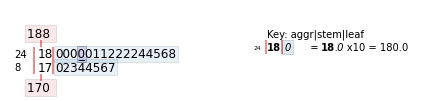

In [4]:
#Para a temperatura existem dados basicamente em duas dezenas, as de 170 e 180, dessa forma o diagrama de ramo e folha pode ser realizado considerando como ramos a centena 
#e dezena (17 e 18) e como folha as unidades.
#Observe que um valor típico é 180 (que se repete 5 vezes), o valor máximo é 188 e o mínimo é 170, os dados variam em um intervalo de 18 (188-170=18), que é menor do que 
#o valor típico (180) por este motivo pode-se afirmar que o intervalo de variação dos dados é pequeno.

temp = [170, 172, 173, 174, 174, 175, 176, 177, 180, 180, 180, 180, 180, 181, 181, 182, 182, 182, 182, 184, 184, 185, 186, 188]
stemgraphic.stem_graphic(temp, scale = 10 )

(<Figure size 540x126 with 1 Axes>, <Axes:>)

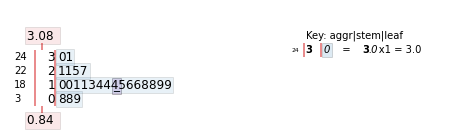

In [5]:
#Para a taxa de eficiência o diagrama de ramo e folha pode ser construído considerando como ramo a unidade e os decimais a folha. 
#Observe que um valor típico é 1,4, o valor máximo é 3,08 e o mínimo é 0,84, os dados variam em um intervalo de 2,24 (3,08-0,84=2,24), nestes dados a distribuição 
#é inclinada para valores grandes, os dois valores maiores poderiam ser valores atípicos.

taxa = [0.84, 1.31, 1.42, 1.03, 1.07, 1.08, 1.04, 1.80, 1.45, 1.60, 1.61, 2.13, 2.15, 0.84, 1.43, 0.90, 1.81, 1.94, 2.68, 1.49, 2.52, 3.0, 1.87, 3.08]
stemgraphic.stem_graphic( taxa , scale = 1 )

##### b.   O valor da taxa de eficiência é determinado completa e exclusivamente pela temperatura do tanque?  Explique seu raciocínio.

In [6]:
#Pelo fato de apresentar taxas diferentes para mesma temperatura, é possível afirmar que há mais variáveis que influenciam a taxa de eficiência

##### c.   Construa um gráfico de dispersão desses dados.  Há algum indício de que a taxa de eficiência pode ser prevista de maneira altamente satisfatória pelo valor da temperatura?  Explique seu raciocínio.

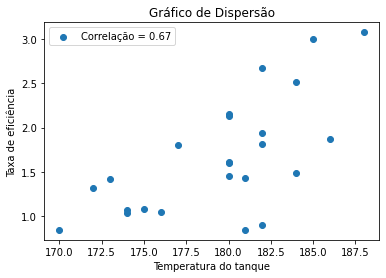

In [7]:
plt.scatter(temp, taxa, label = f'Correlação = {np.round(np.corrcoef(temp, taxa)[0, 1], 2)}')
plt.xlabel('Temperatura do tanque')
plt.ylabel('Taxa de eficiência')
plt.title('Gráfico de Dispersão')
plt.legend()
plt.show()

#Não, Não é satisfatória por apresentar baixa correlação

#### 6. 
O artigo “*Exhaust emissions from four-stroke lawn mower engines*” (J. of the Air and Water Mgnmt. Assoc., 1997: 945-952) apresentou dados de um estudo no qual foram usadas gasolina comum e uma gasolina reformulada em máquinas de cortadoras de grama.  Considere as observações a seguir, sobre a idade (ano) e a emissão de NOx (g/kWh):

In [8]:
#Tabela de Dados
table = [["Motor", 1.0, 2, 3, 4, 5, 6, 7, 8, 9, 10],
         ["Idade", 0, 0, 2, 11, 7, 16, 9, 0, 12, 4],          
         ["Comum", 1.72, 4.38, 4.06, 1.26, 5.31, 0.57, 3.37, 3.44, 0.74, 1.24],
         ["Reformulada", 1.88, 5.93, 5.54, 2.67, 6.53, 0.74, 4.94, 4.89, 0.69, 1.42]]
         
print(tabulate(table))

-----------  ----  ----  ----  -----  ----  -----  ----  ----  -----  -----
Motor        1     2     3      4     5      6     7     8      9     10
Idade        0     0     2     11     7     16     9     0     12      4
Comum        1.72  4.38  4.06   1.26  5.31   0.57  3.37  3.44   0.74   1.24
Reformulada  1.88  5.93  5.54   2.67  6.53   0.74  4.94  4.89   0.69   1.42
-----------  ----  ----  ----  -----  ----  -----  ----  ----  -----  -----


##### Elabore gráficos de dispersão das emissões de NOx versus idade. Qual parece ser a natureza da relação entre essas duas variáveis?

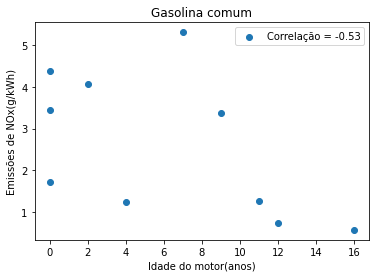

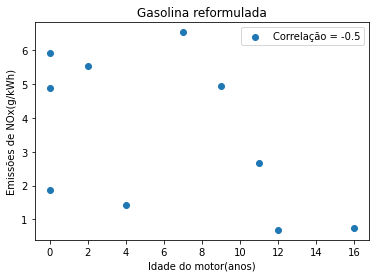

In [9]:
motor = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
idade = [0, 0, 2, 11, 7, 16, 9, 0, 12, 4]        
comum = [1.72, 4.38, 4.06, 1.26, 5.31, 0.57, 3.37, 3.44, 0.74, 1.24]
reformulada = [1.88, 5.93, 5.54, 2.67, 6.53, 0.74, 4.94, 4.89, 0.69, 1.42]

plt.scatter(idade, comum, label = f'Correlação = {np.round(np.corrcoef(idade, comum)[0, 1], 2)}')
#plt.xlim(0.7, 3.1)   #axis x método de cromatografia gasosa
#plt.ylim(169, 190)   #axis y método novo
plt.xlabel('Idade do motor(anos)')
plt.ylabel('Emissões de NOx(g/kWh)') 
plt.title('Gasolina comum')
plt.legend()
plt.show()

plt.scatter(idade, reformulada, label = f'Correlação = {np.round(np.corrcoef(idade, reformulada)[0, 1], 2)}')
#plt.xlim(0.7, 3.1)   #axis x método de cromatografia gasosa
#plt.ylim(169, 190)   #axis y método novo
plt.xlabel('Idade do motor(anos)')
plt.ylabel('Emissões de NOx(g/kWh)') 
plt.title('Gasolina reformulada')
plt.legend()
plt.show()

#Pela baixa correlação não é possível afirmar que a emissão de NOx esteja ligada a idade do motor

#### 7.
Os dados a seguir sobre y = concentração de amônio (mg/L) e x = transpiração (ml/h) foram lidos a partir de um gráfico no artigo: Resposta da remoção de amônio ao crescimento e transpiração de juncus efusus durante o tratamento de esgoto artificial em áreas úmidas em escala de laboratório (*Response of ammonium removal to growth and transpiration of juncus effusus during the treatment of artificial sewage in laboratory-scale wetlands*, Water Research, 2013: 4265-4273). 
O resumo do artigo declarou que “uma correlação linear entre a concentração de amônio dentro da rizosfera e a transpiração das plantas implica que existe uma influência da atividade fisiológica da planta na eficiência da remoção de N”. (A rizosfera é a região estreita do solo na interface raiz-solo da planta e a transpiração é o processo de movimento da água através de uma planta e sua evaporação.) 
O artigo relatou quantidades resumidas de uma análise de regressão linear simples. Com base em um diagrama de dispersão, como você descreveria a relação entre as variáveis e a regressão linear simples parece ser uma estratégia de modelagem adequada? 
Para responder observe os dados obtidos do artigo.

In [102]:
#Tabela de Dados
table = [["x", 5.8, 8.8, 11.0, 13.6, 18.5, 21.0, 23.7, 26.0, 28.3, 31.9, 36.5, 38.2, 40.4],
         ["y", 7.8, 8.2, 6.9, 5.3, 4.7, 4.9, 4.3, 2.7, 2.8, 1.8, 1.9, 1.1, 0.4]]
         
print(tabulate(table))

-  ---  ---  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----
x  5.8  8.8  11    13.6  18.5  21    23.7  26    28.3  31.9  36.5  38.2  40.4
y  7.8  8.2   6.9   5.3   4.7   4.9   4.3   2.7   2.8   1.8   1.9   1.1   0.4
-  ---  ---  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----


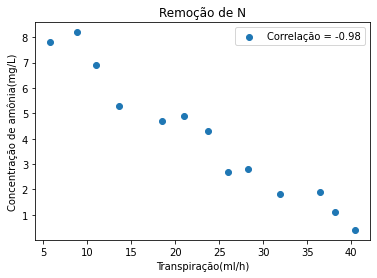

In [11]:
#Transpiração(ml/h)
x = [5.8, 8.8, 11.0, 13.6, 18.5, 21.0, 23.7, 26.0, 28.3, 31.9, 36.5, 38.2, 40.4]

#Concentração de amônia(mg/L)
y = [ 7.8, 8.2, 6.9, 5.3, 4.7, 4.9, 4.3, 2.7, 2.8, 1.8, 1.9, 1.1, 0.4]

plt.scatter(x, y, label = f'Correlação = {np.round(np.corrcoef(x, y)[0, 1], 2)}')
plt.xlabel('Transpiração(ml/h)')
plt.ylabel('Concentração de amônia(mg/L)')
plt.title('Remoção de N')
plt.legend()
plt.show()

#A estratégia de usar uma regressão linear simples é adequada pois o fenômeno apresenta uma correlação linear negativa, ou seja, quanto maior a transpiração,
#menor é a concentração de amônia. Portanto, a transpiração contribui para remoção de N


#### 8. 
O artigo Medição objetiva da elasticidade do queijo mussarela (*Objective measurement of the stretchability of mozzarella cheese*” J. of Texture Studies, 1992: 185-194) descreveu um experimento realizado para investigar como o comportamento do queijo muçarela variou com a temperatura. Considere os dados a seguir sobre x = temperatura e y = aumento (%) ao derreter o queijo.

In [12]:
#Tabela de Dados
table = [["x", 59, 63, 68, 72, 74, 78, 83],
         ["y", 118, 182, 247, 208, 197, 135, 132]]
print(tabulate(table))

-  ---  ---  ---  ---  ---  ---  ---
x   59   63   68   72   74   78   83
y  118  182  247  208  197  135  132
-  ---  ---  ---  ---  ---  ---  ---


##### a. Elabore um gráfico de dispersão em que os eixos se cruzam em (0, 0). Marque 0, 20, 40, 60, 80 e 100 no eixo horizontal e 0, 50, 100, 150, 200 e 250 no eixo vertical. 

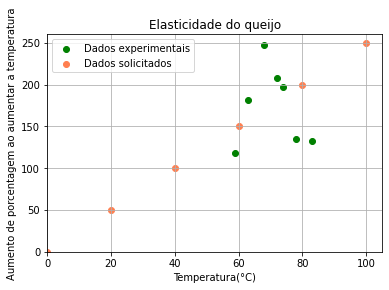

In [13]:
#Temperatura do queijo
temp = [59, 63, 68, 72, 74, 78, 83]

#Aumento da elasticidade do queijo(%)
aumento = [118, 182, 247, 208, 197, 135, 132]

#Delimitar início e limite do gráfico iniciando em (0,0)
plt.xlim(0, 105)
plt.ylim(0, 260)

# Legendas dos eixos
plt.xlabel('Temperatura(°C)')
plt.ylabel('Aumento de porcentagem ao aumentar a temperatura') 

# Marcar os pontos indicados
x = [0, 20, 40, 60, 80, 100]
y = [0, 50, 100, 150, 200, 250]

# Plotar o conjunto de dados obtidos no experimento
plt.scatter(temp, aumento, c = 'green', label = 'Dados experimentais') 

# Plotar os dados indicados na questão
plt.scatter(x, y, c = 'coral', label = 'Dados solicitados')
plt.title('Elasticidade do queijo')
plt.grid(True)
plt.legend()
plt.show()


##### b. Elabore um gráfico de dispersão em que os eixos se cruzam em (55, 100), como foi feito no artigo citado. Será que esse gráfico parece preferível ao do item (a)? Explique seu raciocínio. 

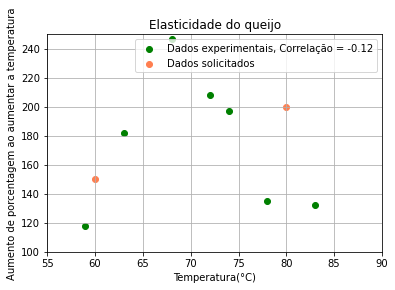

In [14]:
#Temperatura do queijo
temp = [59, 63, 68, 72, 74, 78, 83]

#Aumento da elasticidade do queijo(%)
aumento = [118, 182, 247, 208, 197, 135, 132]

#Delimitar início e limite do gráfico iniciando em (0,0)
plt.xlim(55,90)
plt.ylim(100,250)

# Legendas dos eixos
plt.xlabel('Temperatura(°C)')
plt.ylabel('Aumento de porcentagem ao aumentar a temperatura') 

# Marcar os pontos indicados
x = [0, 20, 40, 60, 80, 100]
y = [0, 50, 100, 150, 200, 250]

# Plotar o conjunto de dados obtidos no experimento
plt.scatter(temp, aumento, c = 'green', label = f'Dados experimentais, Correlação = {np.round(np.corrcoef(temp, aumento)[0,1], 2)}')

# Plotar os dados indicados na questão
plt.scatter(x, y, c = 'coral', label = 'Dados solicitados')
plt.title('Elasticidade do queijo')
plt.grid(True)
plt.legend()
plt.show()

#Melhora a visualização do fenômeno sendo possível afirmar que não há correlação

##### c. O que os gráficos dos itens (a) e (b) sugerem sobre a natureza da relação entre as duas variáveis?   

In [15]:
#No resultado do gráfico pode-se observar que os dados em cor coral (solicitados no item 4a) apresentam o comportamento de uma reta com inclinação de 2,5 (ou 5/2) 
#e intercepto de 0. Já os dados do experimento de temperatura de derretimento do queijo (em verde) se afastam deste tipo de comportamento.

In [24]:
#Há uma correlação negativa entre a ressonância e a soma da aceleração seguindo o comportamento de uma regressão linear, ou seja, outras variávies afetam o fenômeno. 
#Também é possível notar dois outliers

In [26]:
x1 = 18
x2 = 12
y1 = -0.15 + (0.092 * x1)
y2 = -0.15 + (0.092 * x2)
print('uy:18 = {}, uy:12 = {}'.format(y1, y2))

uy:18 = 1.506, uy:12 = 0.9540000000000001
